In [1]:
import sys
import re
import time
from antelope_catalog import LcCatalog
STUDY_PATH = '/data/GitHub/2019/variability_jlca/'  # EDIT THIS to match your installed location

sys.path.append(STUDY_PATH)

cat = LcCatalog(STUDY_PATH + 'catalog', quell_biogenic_co2=True)

Loading JSON data from /data/GitHub/lca-tools/lcatools/qdb/data/flowable_synlist.json:
Loading JSON data from /data/GitHub/lca-tools/lcatools/qdb/data/quantity_synlist.json:
local.qdb: /data/GitHub/2019/variability_jlca/catalog/reference-quantities.json
Loading JSON data from /data/GitHub/2019/variability_jlca/catalog/reference-quantities.json:
local.qdb: /data/GitHub/lca-tools/lcatools/qdb/data/elcd_reference_quantities.json
6 new flow entities added (6 total)
25 new quantity entities added (25 total)


In [2]:
method = ('ReCiPe Midpoint (H)', 'climate change', 'GWP100')

M_GLY = '4d024c87-fcab-4980-9347-c3bee224671f'

# from spreadsheet from Liila Woods 2019-01-10
ts_data = {
    'processes': ['thinkstep TS-1',  #DE: Glycerine (from Epichlor.) ts',
                  'thinkstep TS-2'],  #DE: Glycerine from RME ($ alloc) ts'],
    'linestyles': [
        {
            'linestyle': ':',
            'color': [1, 0, 0]
        },
        {
            'linestyle': '-.',
            'color': [0, 0, 1]
        }
    ],
    method: [8.23562061020724, 0.514477097381447]
}

In [3]:
from lca_variability import MarketIterator

In [4]:
mi_path = STUDY_PATH + 'mkt_var_apos.json'
mi_apos = MarketIterator.restore(mi_path, cat)

local.lcia.ecoinvent.3.1: /data/LCI/Ecoinvent/LCIA/LCIA implementation v3.1 2014_08_13.xlsx
Loading JSON data from /data/GitHub/2019/variability_jlca/catalog/cache/cfa3982d248fbdf0224e3ebad316063c182bbbbd.json.gz:
local.lcia.ecoinvent.3.1: /data/GitHub/2019/variability_jlca/catalog/cache/cfa3982d248fbdf0224e3ebad316063c182bbbbd.json.gz
3255 new flow entities added (3255 total)
703 new quantity entities added (703 total)
local.ecoinvent.3.4.apos: /data/LCI/Ecoinvent/3.4/ecoinvent 3.4_apos_ecoSpold02


In [5]:
from lca_variability import initialize_activity, initialize_market_model

In [6]:
gly_a = initialize_activity('ei3.4 apos', M_GLY)
gly_mkt = initialize_market_model('ei3.4 apos', M_GLY)

Loading JSON data from /data/GitHub/2019/variability_jlca/jupyter/BW2_MCA_4d024c87-fcab-4980-9347-c3bee224671f.json.gz:
Up to date with 5000 samples, 4 methods
Loading JSON data from /data/GitHub/2019/variability_jlca/jupyter/BW2_MktWt_4d024c87-fcab-4980-9347-c3bee224671f.json.gz:
Up to date with 5000 samples, 4 methods


/data/virtualenvs/lca-tools/lib/python3.7/site-packages/scikits/umfpack/umfpack.py:721: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 6.96e+12)
  warnings.warn(msg, UmfpackWarning)


In [7]:
gly_mkt.steps = 5000

Up to date with 5000 samples, 4 methods


In [8]:
from lca_variability.mca_charts import mc_mkt_combo, TraceLine

In [9]:
gly_study = mi_apos.get_result(M_GLY)

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
db_map = {'local.ecoinvent.3.4.apos': ('ei3.4 apos', mi_apos),
          'local.ecoinvent.3.4.cutoff': ('ei3.4 cutoff', None)}

def mkt_flat_compare(_study, _mc_flat, _mc_mkt, _method, **kwargs):
    index, _q = next((i, v) for i, v in enumerate(_study.quantities) if v['Indicator'] == _method[2])
    print('%d %s' % (index, _q))
    fig = plt.figure(figsize=(12, 8))
    tr=[TraceLine(_study.market_scores[index], label='Market average')]
    
    # ts traces
    if _study.market.external_ref == M_GLY:
        if _method in ts_data:
            data = ts_data[_method]
            styles = ts_data['linestyles']
            for i, p in enumerate(ts_data['processes']):
                tr.append(TraceLine(data[i], label=p, **styles[i]))

    _ax = [plt.subplot(2, 1, 1)]
    annot = {'title': '%s - %s' % (_study.market, 'ecoinvent default'),
             'method': '%s: %s [%s]' % _method,
             'ei': db_map[_study.market.origin][0]
            }
    
    mc_mkt_combo(_ax[0], _study.scores(_q), _study.exchange_values, _mc_flat.scores(_method),
                 annot=annot, traces=tr, **kwargs)
    _ax[0].set_xlabel('')
    _ax[0].legend()
    
    
    _ax.append(plt.subplot(2, 1, 2))
    annot['title'] = '%s - %s' % (_study.market, 'discrete probability simulation')

    mc_mkt_combo(_ax[1], _study.scores(_q), _study.exchange_values, _mc_mkt.scores(_method),
                 annot=annot, traces=tr, bins=80, **kwargs)
    
    xmin = min([ax.get_xlim()[0] for ax in _ax])
    xmax = max([ax.get_xlim()[1] for ax in _ax])
    for ax in _ax:
        ax.set_xlim([xmin, xmax])


In [12]:
gly_study.add_scores(mi_apos._query)

local.ecoinvent.3.4.apos.index.20190204: /data/GitHub/2019/variability_jlca/catalog/archives/local.ecoinvent.3.4.apos.index.20190204_background.mat
Loading JSON data from /data/GitHub/2019/variability_jlca/catalog/archives/local.ecoinvent.3.4.apos.index.20190204_background.mat.index.json.gz:
completed 65 iterations
Loading JSON data from /data/GitHub/2019/variability_jlca/catalog/index/a57075ecd68e35920696904ec830bc522fc6b2b2.json.gz:
local.ecoinvent.3.4.apos.index.20190204: /data/GitHub/2019/variability_jlca/catalog/index/a57075ecd68e35920696904ec830bc522fc6b2b2.json.gz
local.ecoinvent.3.4.apos: /data/LCI/Ecoinvent/3.4/ecoinvent 3.4_apos_ecoSpold02
13290 new process entities added (13290 total)
4851 new flow entities added (4851 total)
19 new quantity entities added (19 total)
Multiple CFs found: [22.25, 25.0]
Flow: [local.ecoinvent.3.4.apos] Methane, non-fossil [kg] [[kg]]
Quantity: ReCiPe Midpoint (H), climate change, GWP100 [kg CO2-Eq] [LCIA]
Multiple CFs found: [22.25, 25.0]
Flow:

0 [local.lcia.ecoinvent.3.1] ReCiPe Midpoint (H), climate change, GWP100 [kg CO2-Eq]


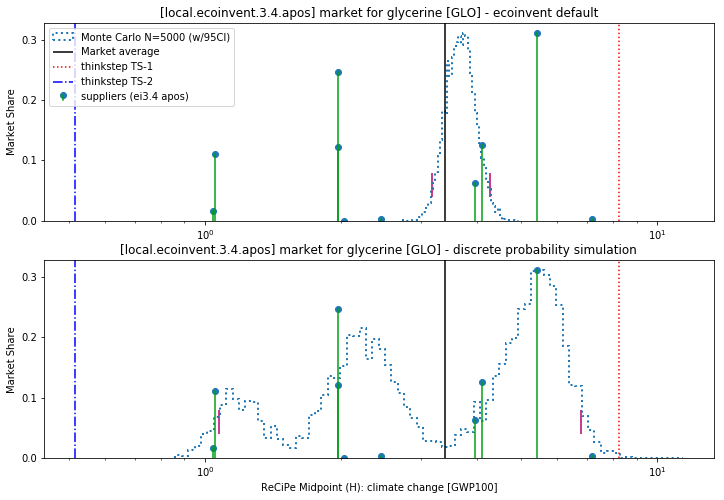

In [15]:
mkt_flat_compare(gly_study, gly_a, gly_mkt, method, log_correct=True, show_ci=True)
plt.savefig('glycerine_ed_img.eps', format='eps', bbox_inches='tight', transparent=True)